In [16]:
# For now lets say we have a Design Matrix X
# and a label matrix Y
# The design matrix is having multiple feature matrix xis
# Let there be m features and n data points
# So the Design Matrix is n*m
# The label matrix is n*1
# The feature matrix is 1*m
# xiT is m*1 ( we will be using this one i guess )

### The ON-LINE Mode
- The W is updated after each feature and hence it is noisy
- But this method is fast
- After each correct prediction we do nothing 
- After each incorrect prediction we update the W with the feature

In [17]:
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class OnlinePerceptron:
    def __init__(self, X, Y, epoch, X_test, Y_test):
        self.X = X
        self.Y = Y
        self.X_test = X_test
        self.Y_test = Y_test
        self.W = np.zeros((X.shape[1], 1), dtype=float)
        self.bias = 0.0
        self.epoch = epoch
        self.n = X.shape[0]
        self.m = X.shape[1]

    def activation_threshold(self, z):
        if z > 0:
            return 1
        else:
            return 0

    def start_perceptron(self):
        for i in range(self.epoch):
            for j in range(self.n):
                x = np.array(self.X[j]).reshape((-1, 1))
                z = np.dot(x.T, self.W) + self.bias
                y_ = self.activation_threshold(z)
                error = self.Y[j] - y_
                self.W += error * x
                self.bias += error

    def test(self, X, Y):
        total_test = X.shape[0]
        correct = 0
        for i in range(total_test):
            x = np.array(X[i]).reshape((-1, 1))
            z = np.dot(x.T, self.W) + self.bias
            y_ = self.activation_threshold(z)
            if y_ == Y[i]:
                correct += 1
        accuracy = correct / total_test * 100
        return accuracy

    def return_W(self):
        for i in range(self.m):
            print(f"Weight for feature x{i} is {self.W[i]}")
        print(f"Bias is {self.bias}")

                


In [19]:
# X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Y = np.array([0, 0, 0, 1]).reshape(-1, 1)
# perceptron = On_line_perceptron(X, Y, epoch=100, bias=0)
# perceptron.start_perceptron()
# perceptron.return_W()

In [20]:
data = np.genfromtxt('toy_data.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [35]:
print(X)

[0     -2.201441
1     -0.291041
2     -0.327755
3     -0.075650
4     -0.862493
         ...   
995   -0.942094
996    1.222445
997   -0.112466
998   -0.403459
999    0.021351
Name: x1, Length: 1000, dtype: float64, 0     -0.468864
1      0.777277
2      0.040071
3      1.821915
4     -0.467493
         ...   
995   -0.835856
996   -0.403177
997   -1.688230
998   -0.412272
999   -0.499017
Name: x2, Length: 1000, dtype: float64]


In [21]:
perceptron = OnlinePerceptron(X_train, y_train, 100, X_test, y_test)
perceptron.start_perceptron()
perceptron.return_W()
print(f"Accuracy for train set is : {perceptron.test(X_train,y_train)}\n")
print(f"Accuracy for test set is : {perceptron.test(X_test, y_test)}\n")

Weight for feature x0 is [1.27340847]
Weight for feature x1 is [1.34642288]
Bias is -1.0
Accuracy for train set is : 100.0

Accuracy for test set is : 93.33333333333333



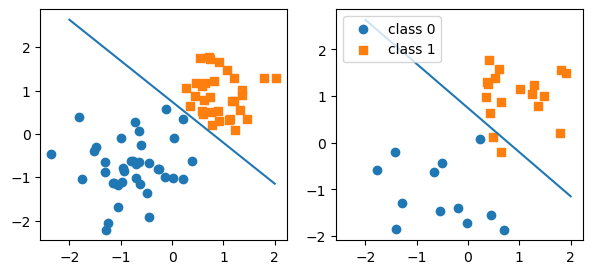

In [22]:
w, b = perceptron.W, perceptron.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b) 
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()

### BATCH MODE
- In this mode, the final/main weights are updated after each epoch instead of updation after each iteration in an epoch as in the case of on-line method
- It is slower but more accurate because less noisy Ws and Bs are created
- Rest the method of updation remains same


In [23]:
class BatchPerceptron:
    def __init__(self, X, Y, epoch, X_test, Y_test):
        self.X = X
        self.Y = Y
        self.X_test = X_test
        self.Y_test = Y_test
        self.W = np.zeros((X.shape[1], 1), dtype=float)
        self.bias = 0.0
        self.epoch = epoch
        self.n = X.shape[0]
        self.m = X.shape[1]

    def activation_threshold(self, z):
        if z > 0:
            return 1
        else:
            return 0

    def start_perceptron(self):
        for i in range(self.epoch):
            w = np.zeros((X.shape[1], 1), dtype=float)
            b = 0.0
            for j in range(self.n):
                x = np.array(self.X[j]).reshape((-1, 1))
                z = np.dot(x.T, w) + b
                y_ = self.activation_threshold(z)
                error = self.Y[j] - y_
                w += error * x
                b += error
            self.W += w
            self.bias += b

    def test(self, X, Y):
        total_test = X.shape[0]
        correct = 0
        for i in range(total_test):
            x = np.array(X[i]).reshape((-1, 1))
            z = np.dot(x.T, self.W) + self.bias
            y_ = self.activation_threshold(z)
            if y_ == Y[i]:
                correct += 1
        accuracy = correct / total_test * 100
        return accuracy

    def return_W(self):
        for i in range(self.m):
            print(f"Weight for feature x{i} is {self.W[i]}")
        print(f"Bias is {self.bias}")

                


In [24]:
perceptron = BatchPerceptron(X_train, y_train, 100, X_test, y_test)
perceptron.start_perceptron()
perceptron.return_W()
print(f"Accuracy for train set is : {perceptron.test(X_train,y_train)}\n")
print(f"Accuracy for test set is : {perceptron.test(X_test, y_test)}\n")

Weight for feature x0 is [127.34084715]
Weight for feature x1 is [134.64228795]
Bias is -100.0
Accuracy for train set is : 100.0

Accuracy for test set is : 93.33333333333333

